In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
sns.set_style('whitegrid')

In [9]:
%matplotlib inline
# from pandas.io.data import DataReader
# from datetime import datetime

In [17]:
from datetime import datetime

In [26]:
from pandas_datareader import data, wb


In [18]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [19]:
end=datetime.now()
start=datetime(end.year-1, end.month, end.day)

In [29]:
from pandas_datareader.data import DataReader

In [31]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [35]:
GOOG.head(2)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-10,1142.050049,1130.969971,1131.219971,1140.479980,1209500,1140.479980
2019-07-11,1153.069946,1139.579956,1143.250000,1144.209961,1195500,1144.209961


In [36]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,274.598307,268.313075,271.071023,271.750869,3.468088e+07,270.552295
std,48.245522,47.209835,47.613663,47.900308,1.709315e+07,48.459037
min,198.070007,192.580002,195.410004,193.339996,1.165440e+07,191.059784
25%,228.290001,224.657501,226.460003,227.014996,2.359105e+07,225.190006
50%,271.050003,265.350006,267.839996,268.179993,3.002775e+07,267.193878
75%,316.362503,309.234993,312.074997,311.392502,4.051898e+07,310.855652
max,385.269989,378.830994,385.049988,383.010010,1.067212e+08,383.010010


In [37]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-07-10 to 2020-07-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


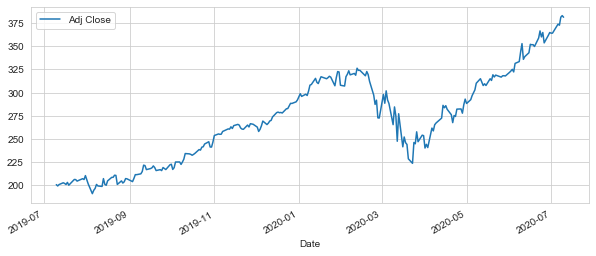

In [39]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

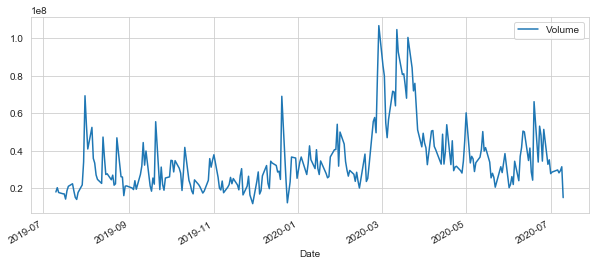

In [40]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

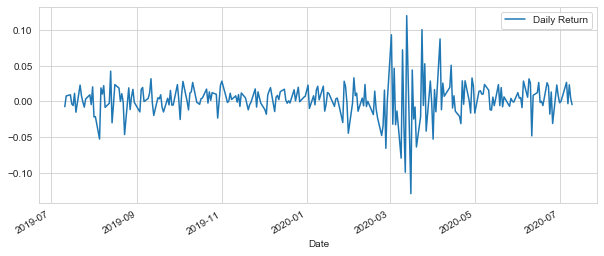

In [50]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True)

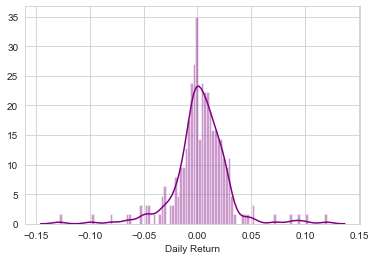

In [51]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100,color='purple')

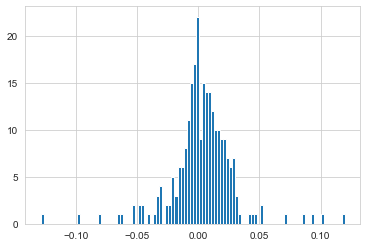

In [52]:
AAPL['Daily Return'].hist(bins=100)

In [53]:
closing_df=DataReader(tech_list, 'yahoo',start,end)['Adj Close']

In [54]:
tech_rets=closing_df.pct_change()

In [55]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-10,200.833160,1140.479980,136.174347,2017.410034
2019-07-11,199.370621,1144.209961,136.717636,2001.069946
2019-07-12,200.902344,1144.900024,137.211563,2011.000000
2019-07-15,202.789810,1150.339966,137.211563,2020.989990
2019-07-16,202.088181,1153.579956,135.413681,2009.900024


In [56]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-10,NaN,NaN,NaN,NaN
2019-07-11,-0.007282,0.003271,0.003990,-0.008100
2019-07-12,0.007683,0.000603,0.003613,0.004962
2019-07-15,0.009395,0.004751,0.000000,0.004968
2019-07-16,-0.003460,0.002817,-0.013103,-0.005487


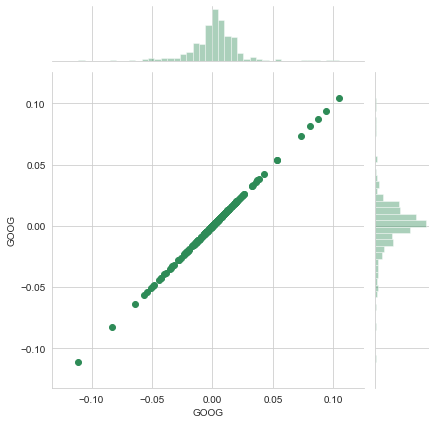

In [58]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

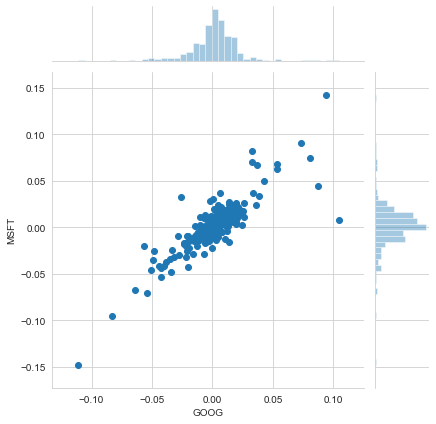

In [59]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

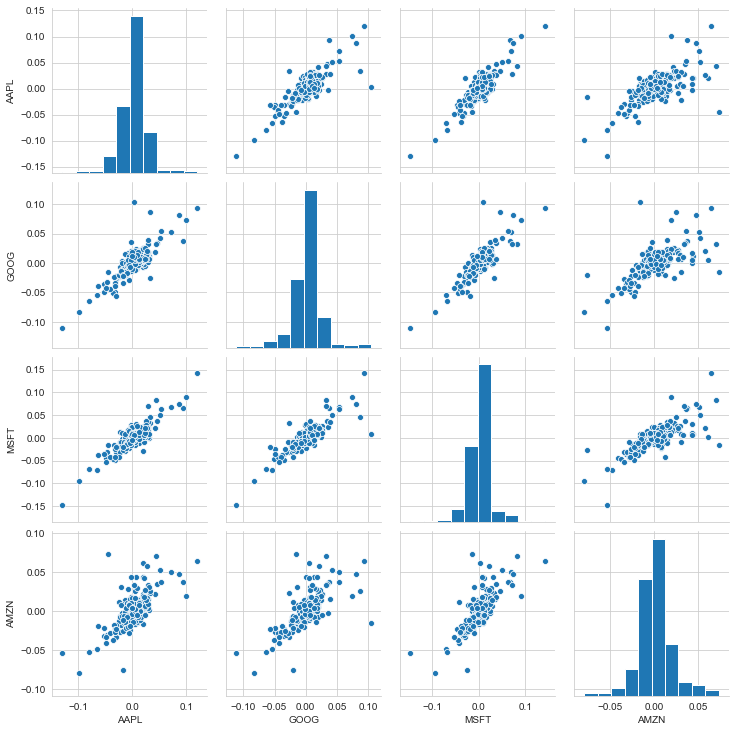

In [60]:
sns.pairplot(tech_rets.dropna())

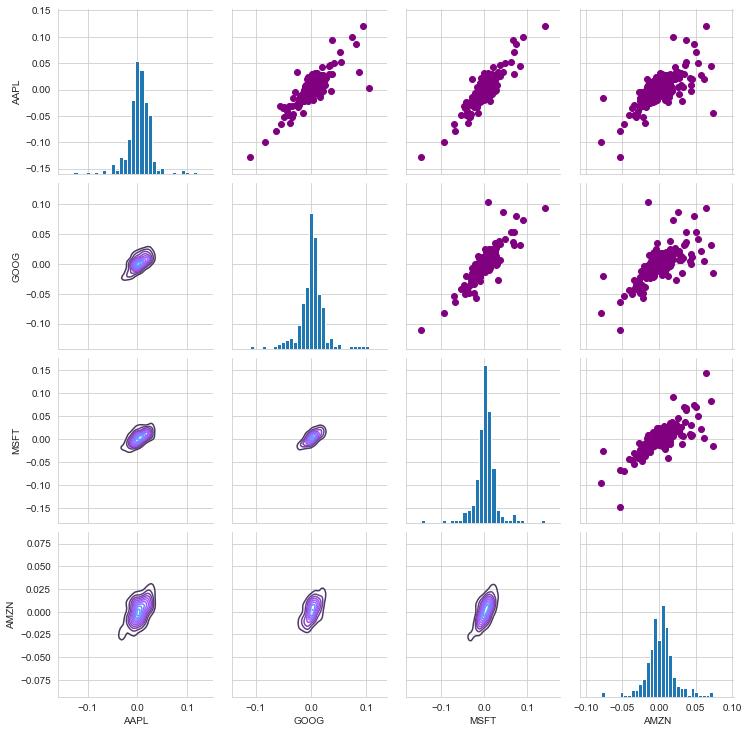

In [61]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

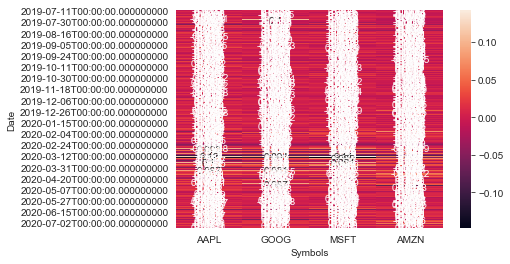

In [63]:
sns.heatmap(tech_rets.dropna(),annot=True)

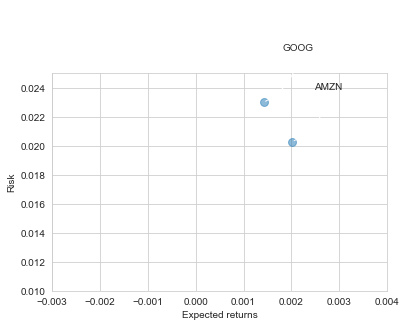

In [64]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

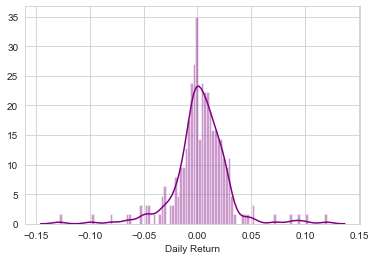

In [65]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [66]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.03421546526840809

In [67]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [68]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price